In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('medical_examination.csv') #READING THE CSV FILE

In [3]:
#ADDING OVERWEIGHT COLUMN
BMI = df['weight'] / ((df['height']) ** 2) #CREATING BMI
overweight_list = [] #First establishing a list to later turn into a panda series

for i in BMI:
    if i > .0025:
        overweight_list.append(1)
    else:
        overweight_list.append(0)

overweight_series = pd.Series(overweight_list) #Convert list to series
        
df['overweight'] = overweight_series #Add attribute to the dataframe

In [4]:
#Cleaning up cholesterol
#If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.
print(df['cholesterol'].value_counts())

df['cholesterol'] = df['cholesterol'].replace({1:0, 2:1, 3:1})
print(df['cholesterol'].value_counts())

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64
0    52385
1    17615
Name: cholesterol, dtype: int64


In [5]:
#Cleaning up gluc
print(df['gluc'].value_counts())

df['gluc'] = df['gluc'].replace({1:0, 2:1, 3:1})
print(df['gluc'].value_counts())
df.head()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64
0    59479
1    10521
Name: gluc, dtype: int64


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [6]:
cardio_0 = df[df['cardio'] == 0]
cardio_1 = df[df['cardio'] == 1]

In [7]:
#Cardio 0 Chart Data
x_axis = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']
y_axis_c0_1s = []
y_axis_c0_0s = []

y_axis_c0_1s.append(cardio_0['active'].value_counts()[1])
y_axis_c0_1s.append(cardio_0['alco'].value_counts()[1])
y_axis_c0_1s.append(cardio_0['cholesterol'].value_counts()[1])
y_axis_c0_1s.append(cardio_0['gluc'].value_counts()[1])
y_axis_c0_1s.append(cardio_0['overweight'].value_counts()[1])
y_axis_c0_1s.append(cardio_0['smoke'].value_counts()[1])

y_axis_c0_0s.append(cardio_0['active'].value_counts()[0])
y_axis_c0_0s.append(cardio_0['alco'].value_counts()[0])
y_axis_c0_0s.append(cardio_0['cholesterol'].value_counts()[0])
y_axis_c0_0s.append(cardio_0['gluc'].value_counts()[0])
y_axis_c0_0s.append(cardio_0['overweight'].value_counts()[0])
y_axis_c0_0s.append(cardio_0['smoke'].value_counts()[0])

print(y_axis_c0_1s)
print(y_axis_c0_0s)

[28643, 1941, 5691, 4127, 19106, 3240]
[6378, 33080, 29330, 30894, 15915, 31781]


In [8]:
#Cardio 1 Chart Data
y_axis_c1_1s = []
y_axis_c1_0s = []

y_axis_c1_1s.append(cardio_1['active'].value_counts()[1])
y_axis_c1_1s.append(cardio_1['alco'].value_counts()[1])
y_axis_c1_1s.append(cardio_1['cholesterol'].value_counts()[1])
y_axis_c1_1s.append(cardio_1['gluc'].value_counts()[1])
y_axis_c1_1s.append(cardio_1['overweight'].value_counts()[1])
y_axis_c1_1s.append(cardio_1['smoke'].value_counts()[1])

y_axis_c1_0s.append(cardio_1['active'].value_counts()[0])
y_axis_c1_0s.append(cardio_1['alco'].value_counts()[0])
y_axis_c1_0s.append(cardio_1['cholesterol'].value_counts()[0])
y_axis_c1_0s.append(cardio_1['gluc'].value_counts()[0])
y_axis_c1_0s.append(cardio_1['overweight'].value_counts()[0])
y_axis_c1_0s.append(cardio_1['smoke'].value_counts()[0])

print(y_axis_c1_1s)
print(y_axis_c1_0s)

[27618, 1823, 11924, 6394, 24440, 2929]
[7361, 33156, 23055, 28585, 10539, 32050]


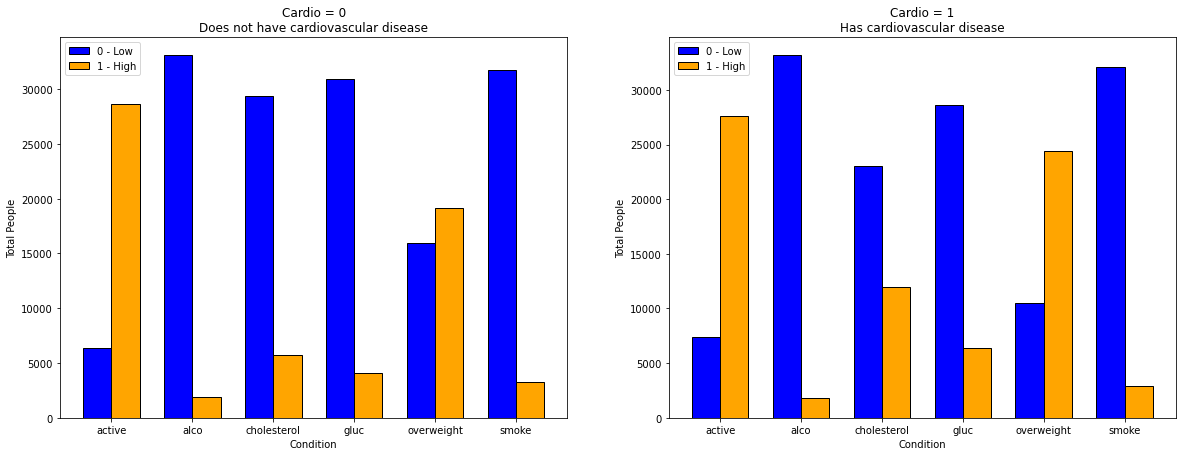

In [9]:
plt.figure(figsize=(20, 7))

n = len(x_axis)
r = np.arange(n)
width = 0.35

#Cardio 0 Chart
plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.bar(r, y_axis_c0_0s, color = 'b',
        width = width, edgecolor = 'black',
        label='0 - Low')
plt.bar(r + width, y_axis_c0_1s, color = 'orange',
        width = width, edgecolor = 'black',
        label='1 - High')
plt.xlabel("Condition")
plt.ylabel("Total People")
plt.title('Cardio = 0\nDoes not have cardiovascular disease')
plt.xticks(r + width/2, x_axis)
plt.legend()

#Cardio 1 Chart
plt.subplot(1, 2, 2)
plt.title('Cardio = 1\nHas cardiovascular disease')
plt.bar(r, y_axis_c1_0s, color = 'b',
        width = width, edgecolor = 'black',
        label='0 - Low')
plt.bar(r + width, y_axis_c1_1s, color = 'orange',
        width = width, edgecolor = 'black',
        label = '1 - High')
plt.xlabel("Condition")
plt.ylabel("Total People")
plt.xticks(r + width/2, x_axis)
plt.legend()

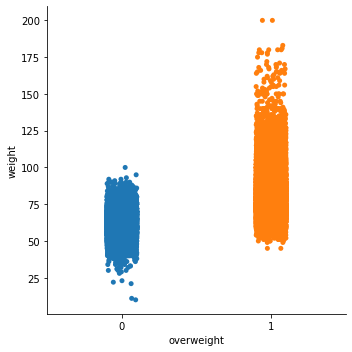

In [10]:
sns.catplot(x='overweight', y='weight', data=df)

In [11]:
#Cleaning the data again

#df = df.drop((df[df['ap_lo'] > df['ap_hi']]).index)
#df = df.drop((df[df['height'] < df['height'].quantile(0.025)]).index)
#df = df.drop((df[df['height'] > df['height'].quantile(0.975)]).index)
#df = df.drop((df[df['weight'] < df['weight'].quantile(0.025)]).index)
#df = df.drop((df[df['weight'] > df['weight'].quantile(0.975)]).index)

df = (df[df['ap_lo'] <= df['ap_hi']])
df = (df[df['height'] >= df['height'].quantile(0.025)])
df = (df[df['height'] <= df['height'].quantile(0.975)])
df = (df[df['weight'] >= df['weight'].quantile(0.025)])
df = (df[df['weight'] <= df['weight'].quantile(0.975)])

df[0:20]

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
5,8,21914,1,151,67.0,120,80,1,1,0,0,0,0,1
6,9,22113,1,157,93.0,130,80,1,0,0,0,1,0,1
7,12,22584,2,178,95.0,130,90,1,1,0,0,1,1,1
8,13,17668,1,158,71.0,110,70,0,0,0,0,1,0,1
9,14,19834,1,164,68.0,110,60,0,0,0,0,0,0,1


In [12]:
correlation = df.corr()
correlation

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002623,0.003799,0.000221,0.000144,0.003489,0.000429,0.003867,0.002477,-0.002403,-0.001039,0.005890,0.003770,-0.000769
age,0.002623,1.000000,-0.018274,-0.077426,0.069705,0.018482,0.152787,0.129582,0.087280,-0.044208,-0.026956,-0.011471,0.239987,0.089282
sex,0.003799,-0.018274,1.000000,0.504722,0.130116,0.004941,0.059500,-0.037669,-0.021178,0.337682,0.169178,0.007702,0.001727,-0.055146
height,0.000221,-0.077426,0.504722,1.000000,0.248868,0.004300,0.015356,-0.064477,-0.031410,0.187389,0.089257,-0.005042,-0.025673,-0.156139
weight,0.000144,0.069705,0.130116,0.248868,1.000000,0.026527,0.223786,0.132686,0.104475,0.055805,0.058286,-0.012112,0.166886,0.655764
ap_hi,0.003489,0.018482,0.004941,0.004300,0.026527,1.000000,0.072260,0.022606,0.011004,-0.001978,0.000607,-0.000162,0.050321,0.016900
ap_lo,0.000429,0.152787,0.059500,0.015356,0.223786,0.072260,1.000000,0.148701,0.073920,0.022997,0.031839,0.002184,0.326125,0.169567
cholesterol,0.003867,0.129582,-0.037669,-0.064477,0.132686,0.022606,0.148701,1.000000,0.383601,0.012797,0.037588,0.002804,0.202257,0.126770
gluc,0.002477,0.087280,-0.021178,-0.031410,0.104475,0.011004,0.073920,0.383601,1.000000,-0.004203,0.013617,-0.009629,0.088267,0.086850
smoke,-0.002403,-0.044208,0.337682,0.187389,0.055805,-0.001978,0.022997,0.012797,-0.004203,1.000000,0.341434,0.027203,-0.020605,-0.003981


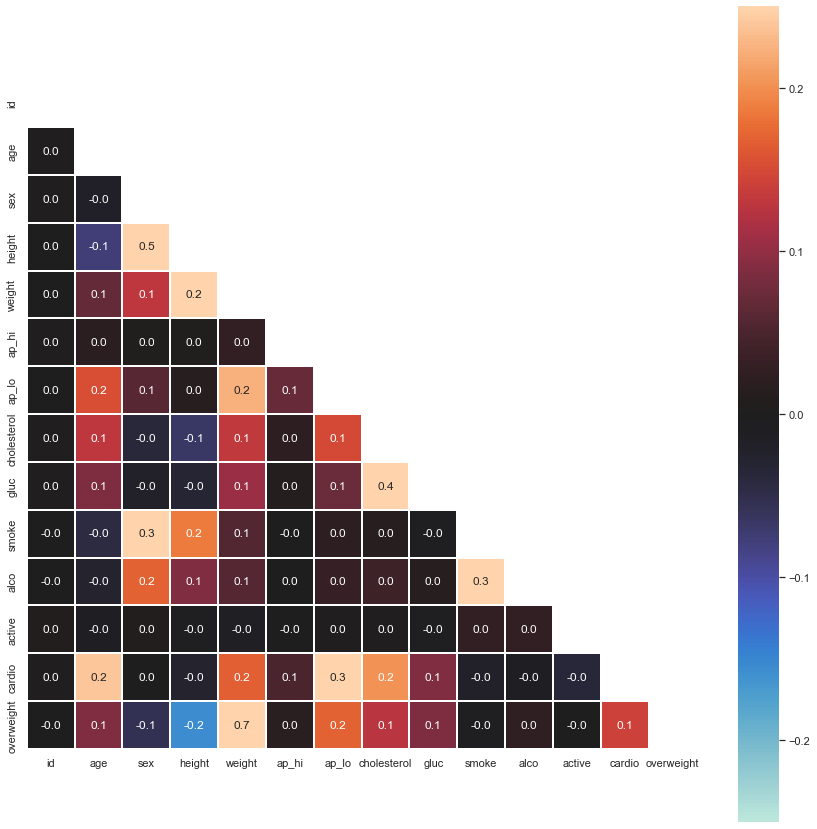

In [13]:
#MAKING THE SEABORN HEATMAP
mask = np.zeros_like(correlation, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(correlation, annot=True, vmin = -0.25, vmax = 0.25, cmap = "icefire", square=True, linewidths=2, mask=mask, fmt='.1f').set_facecolor("white")